In [82]:
import pandas as pd
import numpy as np
import seaborn  as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier

In [2]:
loan = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# # ...........................Problem with Data..................................

In [4]:
loan = loan.drop(['Loan_ID'], axis=1)

# 1) Null Values

In [5]:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# 2) Skewness

In [6]:
loan.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

# 3) Multicollinearity check

<Axes: >

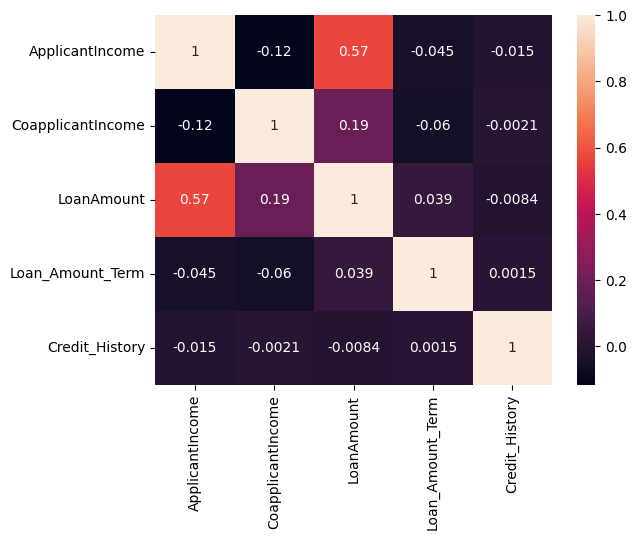

In [7]:
sns.heatmap(loan.corr(), annot=True)

# 4) Imbalance Dataset

In [8]:
loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# # .......................... Data Analysis...............................

# fill Missing Values

In [9]:
loan['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [10]:
loan['Self_Employed'] = loan['Self_Employed'].fillna('No')
loan['Gender'] = loan['Gender'].fillna('Male')
loan['Married'] = loan['Married'].fillna('Yes')
loan['LoanAmount'] = loan['LoanAmount'].fillna(146.41)
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(342.0)
loan['Credit_History'] = loan['Credit_History'].fillna(1.0)
loan['Dependents'] = loan['Dependents'].fillna(0)

In [11]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 1) Gender vs Education

<Axes: xlabel='Gender'>

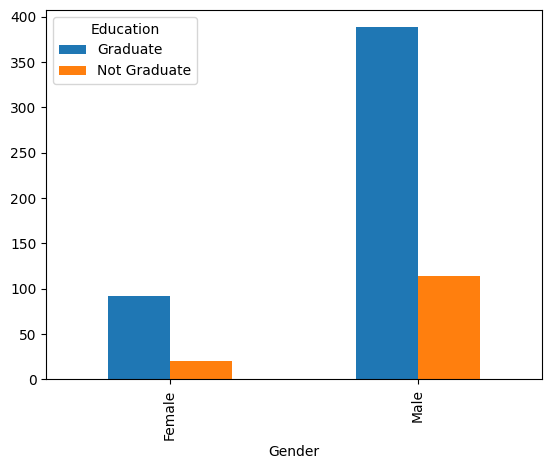

In [12]:
pd.crosstab(loan['Gender'], loan['Education']).plot(kind='bar')

In [13]:
pd.crosstab(loan['Gender'], loan['Education'])

Education,Graduate,Not Graduate
Gender,,
Female,92,20
Male,388,114


# there are 92 female and 388 male graduate 
# there are 20 female and 114 male non graduate 

# 1) Gender vs Loan_Status

<Axes: xlabel='Gender'>

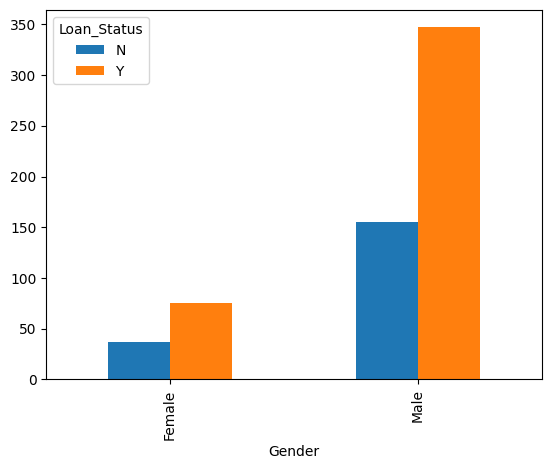

In [14]:
pd.crosstab(loan['Gender'], loan['Loan_Status']).plot(kind='bar')

In [15]:
pd.crosstab(loan['Gender'], loan['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


# Number of males are higher than female, 
# number of male are 346 whose loan is accepted and 155 whose loan is not approved 
# number of female are 76 whose loan is accepted and 37 whose loan is not approved

# 2) Self_Employed vs Loan_Status

<Axes: xlabel='Self_Employed'>

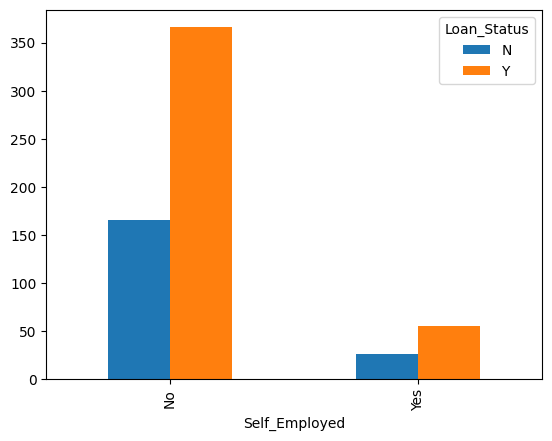

In [16]:
pd.crosstab(loan['Self_Employed'], loan['Loan_Status']).plot(kind='bar')

In [17]:
pd.crosstab(loan['Self_Employed'], loan['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


# there are 364 applicant whose loan is approved are not self employed
# there are 164 applicant whose loan is not approved are not self employed

# there are 58 applicant whose loan is approved and are self employeed and 28 whose loan is not approved are self employed

# 3) Education vs Loan_Status

array([<Axes: ylabel='N'>, <Axes: ylabel='Y'>], dtype=object)

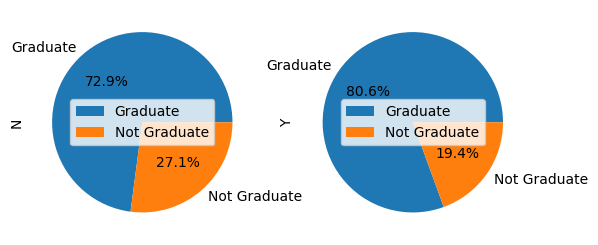

In [18]:
pd.crosstab(loan['Education'], loan['Loan_Status']).plot(kind='pie', subplots=True, autopct='%1.1f%%')

In [19]:
pd.crosstab(loan['Education'], loan['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


# 72.9% applicants whose loan is not approved, are graduate 
# 27.1% applicants whose loan is not approved are not graduate

# 80.6% applicants whose loan is approved, are graduate 
# 19.4% applicants whose loan is approved are not graduate 

# 4) Applicant Income vs LoanAmount

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

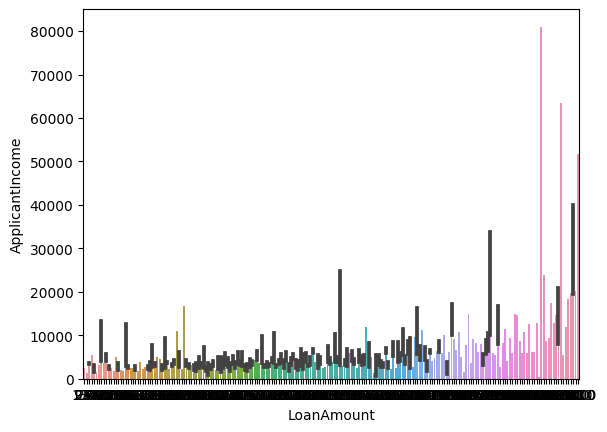

In [20]:
sns.barplot(data=loan, y='ApplicantIncome', x='LoanAmount')

In [21]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.00,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.00,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.00,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.00,360.0,1.0,Urban,Y


# Married vs Loan_Status

<Axes: xlabel='Married', ylabel='Loan_Status'>

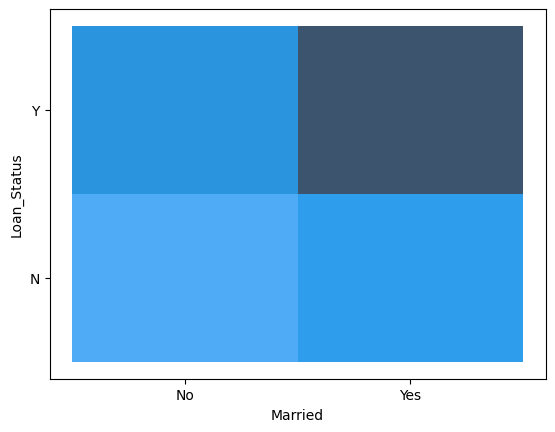

In [22]:
sns.histplot(data=loan, x='Married', y='Loan_Status')

<Axes: xlabel='Property_Area'>

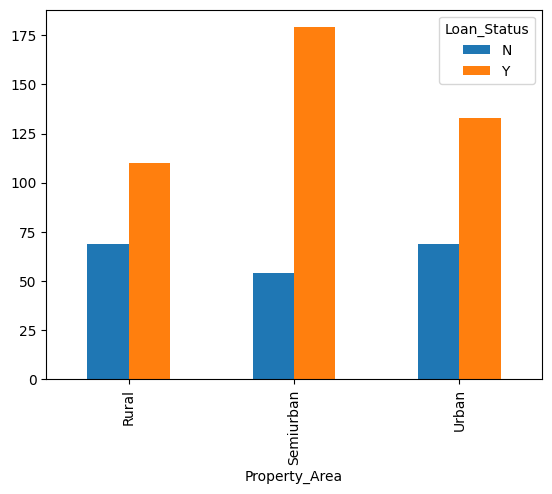

In [23]:
pd.crosstab(loan['Property_Area'], loan['Loan_Status']).plot(kind='bar')

In [24]:
pd.crosstab(loan['Property_Area'], loan['Loan_Status'])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [25]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.00,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.00,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.00,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.00,360.0,1.0,Urban,Y


# ,.................................Data Preparation........................... 

In [26]:
loans = loan

# 1 ) Outliers Detection and Removal

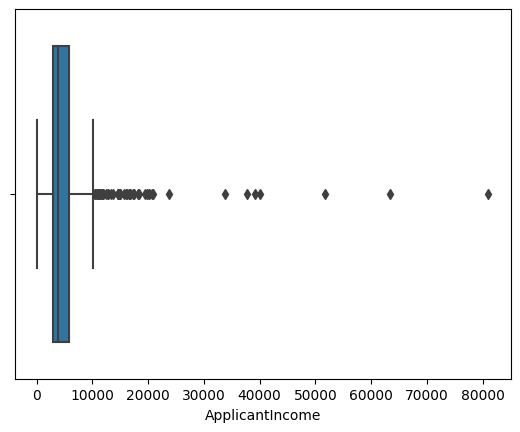

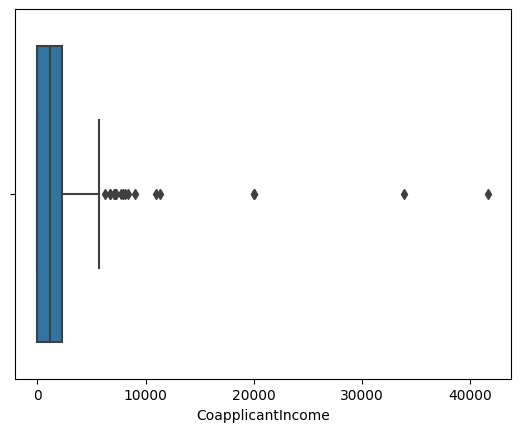

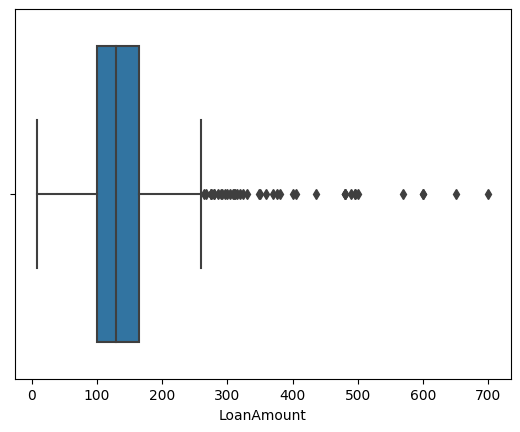

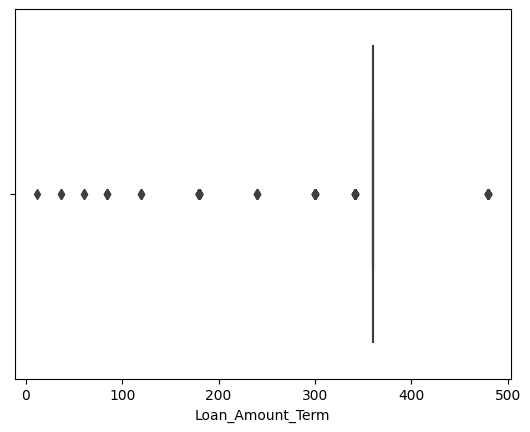

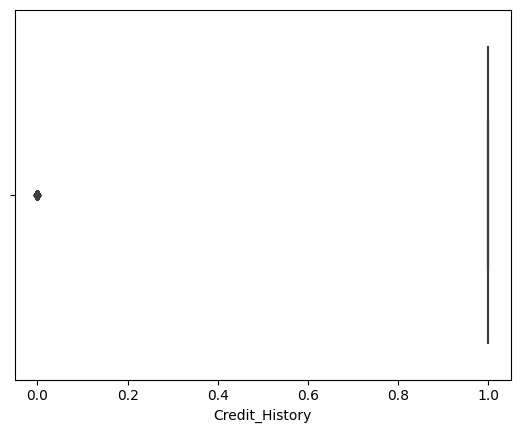

In [27]:
for i in loans.columns:
    if i != 'object' and loans[i].dtype != 'object':
        sns.boxplot(data=loans, x=i)
        plt.show()
    

In [28]:


for i in loans.columns:
    if loans[i].dtype !='object':
        q75 = loans[i].quantile(0.75)
        q25 = loans[i].quantile(0.25)
        iqr = q75 - q25
        upper = q75 + 1.5 * iqr
        lower = q25 - 1.5 * iqr
        print(i)
        print('Upper', upper)
        print('Lower', lower)
        print(',,,,,,,,,,,,,')
        
        
       

ApplicantIncome
Upper 10171.25
Lower -1498.75
,,,,,,,,,,,,,
CoapplicantIncome
Upper 5743.125
Lower -3445.875
,,,,,,,,,,,,,
LoanAmount
Upper 261.5
Lower 3.5
,,,,,,,,,,,,,
Loan_Amount_Term
Upper 360.0
Lower 360.0
,,,,,,,,,,,,,
Credit_History
Upper 1.0
Lower 1.0
,,,,,,,,,,,,,


In [29]:
loans1 = loans[loans['ApplicantIncome'] <= 10171.25]
loans2 = loans1[loans1['CoapplicantIncome'] <= 5743.125]
loans3 = loans2[loans2['LoanAmount'] <= 266.875]
loans4 = loans3[loans3['Loan_Amount_Term'] >= 360]

In [30]:
loans5 = loans4.reset_index()

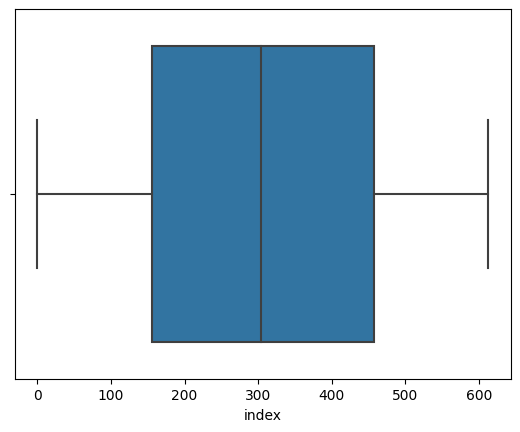

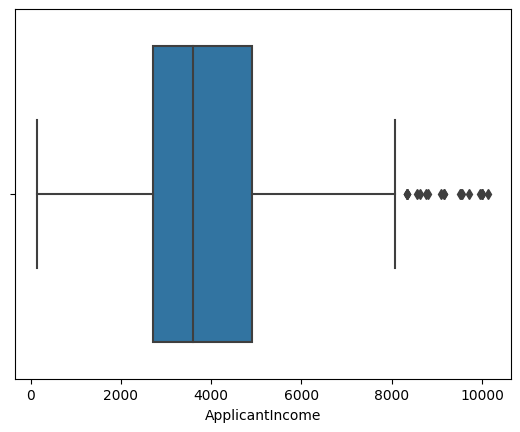

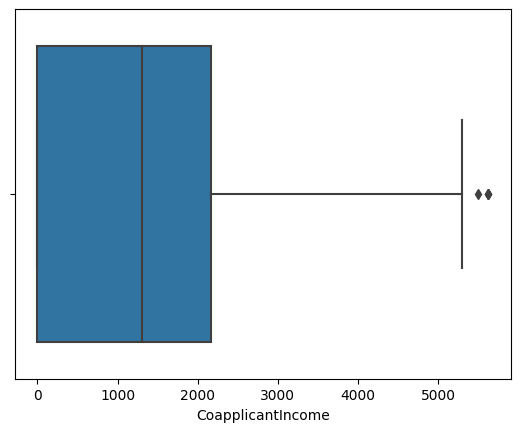

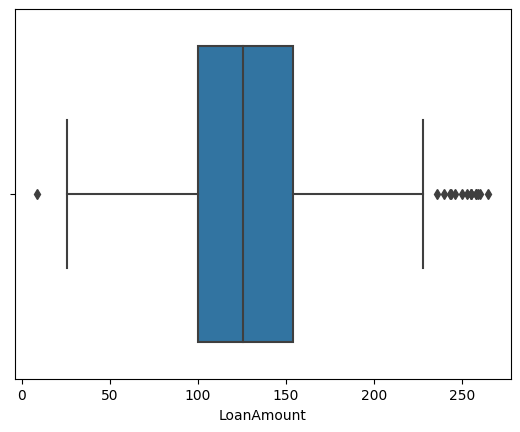

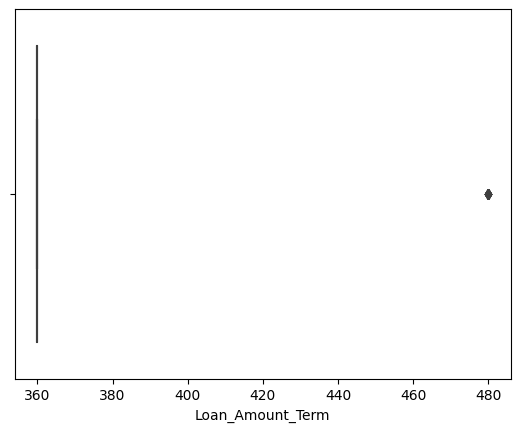

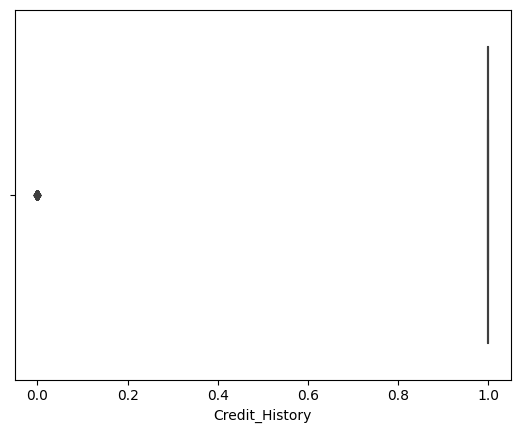

In [31]:
for i in loans5.columns:
    if i != 'object' and loans5[i].dtype != 'object':
        sns.boxplot(data=loans5, x=i)
        plt.show()

# Loss of Data

In [32]:
473 / 614 * 100

77.0358306188925

# 2) Separation of Numerical and Categorical Features

# Numerical and Categorical

In [33]:
num = [i for i in loans5.columns if loans5[i].dtype !='object']

numerical = loans5[num]
numerical

,index,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5849,0.0,146.41,360.0,1.0
1,1,4583,1508.0,128.00,360.0,1.0
2,2,3000,0.0,66.00,360.0,1.0
3,3,2583,2358.0,120.00,360.0,1.0
4,4,6000,0.0,141.00,360.0,1.0
...,...,...,...,...,...,...
455,608,3232,1950.0,108.00,360.0,1.0
456,609,2900,0.0,71.00,360.0,1.0
457,611,8072,240.0,253.00,360.0,1.0
458,612,7583,0.0,187.00,360.0,1.0


In [34]:
cat = [i for i in loans5.columns if loans5[i].dtype =='object']

categorical = loans5[cat]
categorical

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
455,Male,Yes,0,Graduate,No,Rural,Y
456,Female,No,0,Graduate,No,Rural,Y
457,Male,Yes,1,Graduate,No,Urban,Y
458,Male,Yes,2,Graduate,No,Urban,Y


In [35]:
categorical['Dependents'].unique()

array(['0', '1', '3+', '2', 0], dtype=object)

In [36]:
categorical['Dependents'] = categorical['Dependents'].replace({'0':0, '1':1, '2':2, '3+':3})

# Target Columns

In [37]:
y = categorical['Loan_Status']

In [38]:
categorical1 = categorical

In [39]:
categorical1

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
455,Male,Yes,0,Graduate,No,Rural,Y
456,Female,No,0,Graduate,No,Rural,Y
457,Male,Yes,1,Graduate,No,Urban,Y
458,Male,Yes,2,Graduate,No,Urban,Y


# Ordinal Encoder 

In [40]:
categorical1

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
455,Male,Yes,0,Graduate,No,Rural,Y
456,Female,No,0,Graduate,No,Rural,Y
457,Male,Yes,1,Graduate,No,Urban,Y
458,Male,Yes,2,Graduate,No,Urban,Y


In [41]:
column = ['Education','Dependents']
graduate = categorical1[column]

In [42]:
oe = OrdinalEncoder()

In [43]:
numerical['Education'] = oe.fit_transform(graduate[['Education']])
numerical['Dependents'] = oe.fit_transform(graduate[['Dependents']])

In [44]:
numerical3 = numerical.drop(['index'], axis=1)

In [45]:
numerical3

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education,Dependents
0,5849,0.0,146.41,360.0,1.0,0.0,0.0
1,4583,1508.0,128.00,360.0,1.0,0.0,1.0
2,3000,0.0,66.00,360.0,1.0,0.0,0.0
3,2583,2358.0,120.00,360.0,1.0,1.0,0.0
4,6000,0.0,141.00,360.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
455,3232,1950.0,108.00,360.0,1.0,0.0,0.0
456,2900,0.0,71.00,360.0,1.0,0.0,0.0
457,8072,240.0,253.00,360.0,1.0,0.0,1.0
458,7583,0.0,187.00,360.0,1.0,0.0,2.0


In [46]:
numerical3['Dependents'].value_counts()

0.0    282
2.0     79
1.0     68
3.0     31
Name: Dependents, dtype: int64

# Encoding through OneHotEncoder

In [47]:
categorical2 = categorical1.drop(['Education','Dependents'], axis=1)

In [48]:
ohe = OneHotEncoder(drop='first', sparse=False)



In [49]:
encoded = pd.DataFrame(ohe.fit_transform(categorical2))

In [50]:
encoded

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,1.0,1.0
3,1.0,1.0,0.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...
455,1.0,1.0,0.0,0.0,0.0,1.0
456,0.0,0.0,0.0,0.0,0.0,1.0
457,1.0,1.0,0.0,0.0,1.0,1.0
458,1.0,1.0,0.0,0.0,1.0,1.0


# Label Encoder 

In [51]:
le = LabelEncoder()

In [52]:
Target = le.fit_transform(y)

# Merging database

In [53]:
x = pd.merge(numerical3, encoded, left_index=True, right_index=True)

In [54]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education,Dependents,0,1,2,3,4,5
0,5849,0.0,146.41,360.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,4583,1508.0,128.00,360.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,3000,0.0,66.00,360.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
3,2583,2358.0,120.00,360.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,6000,0.0,141.00,360.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,3232,1950.0,108.00,360.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
456,2900,0.0,71.00,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
457,8072,240.0,253.00,360.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
458,7583,0.0,187.00,360.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0


# -------------------------Distribution of Data---------------------------------

# Univariate analysis

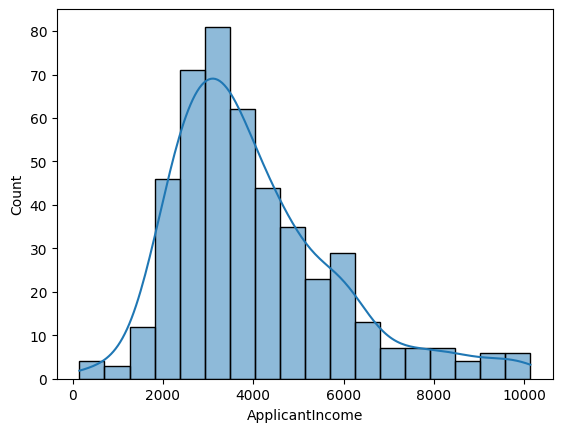

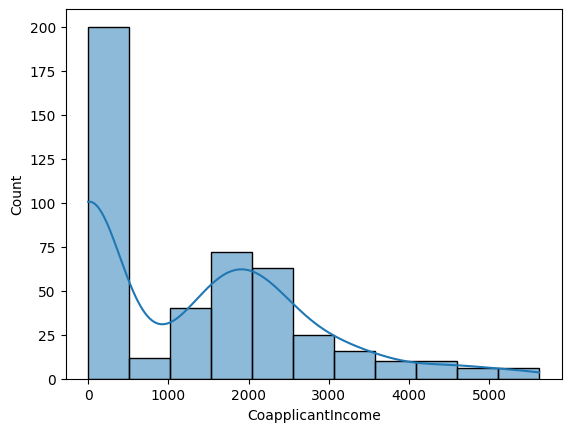

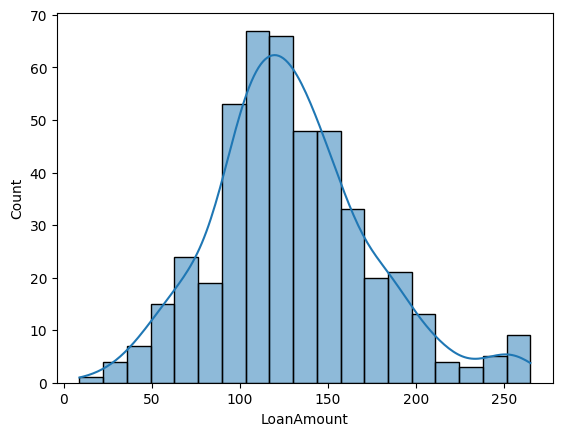

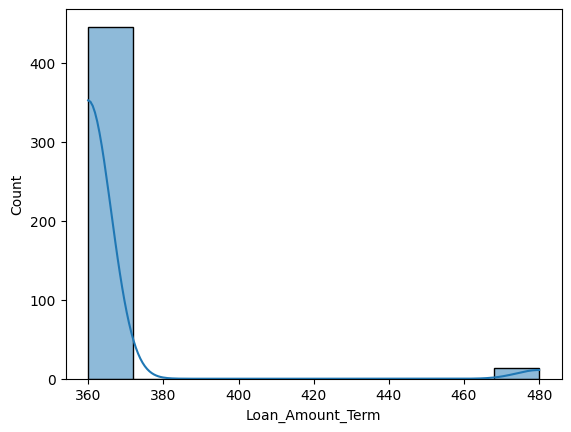

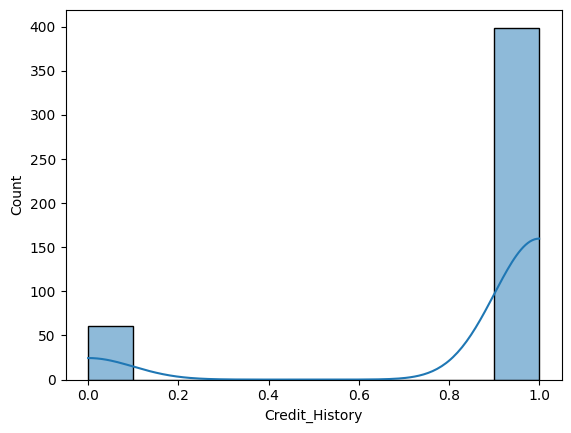

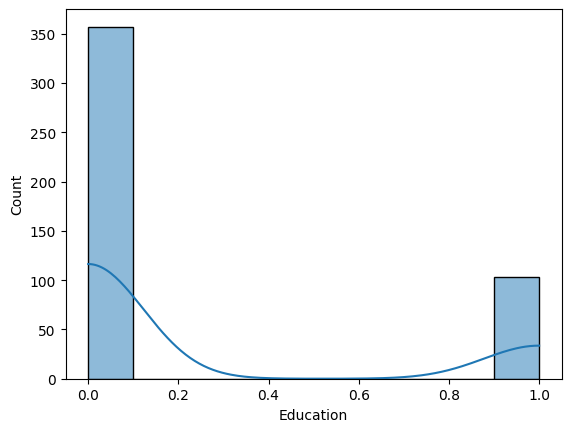

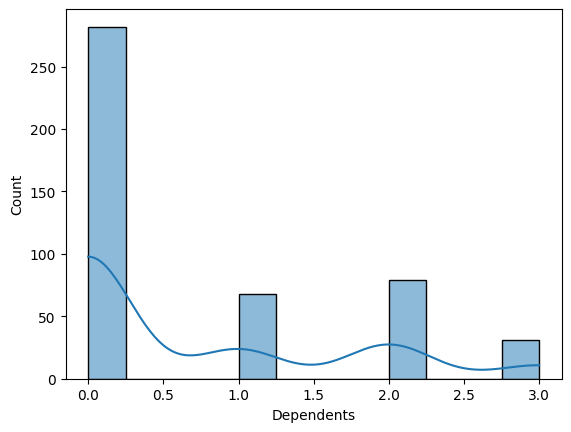

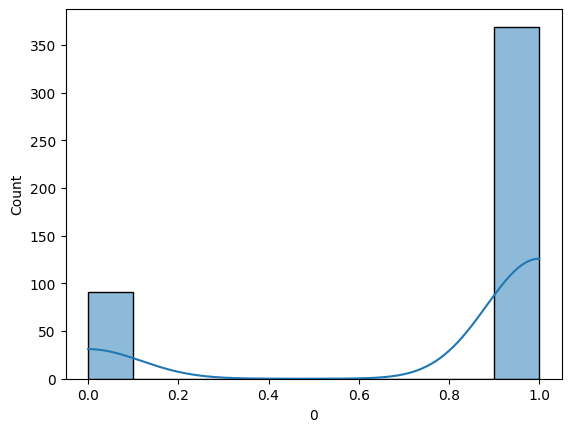

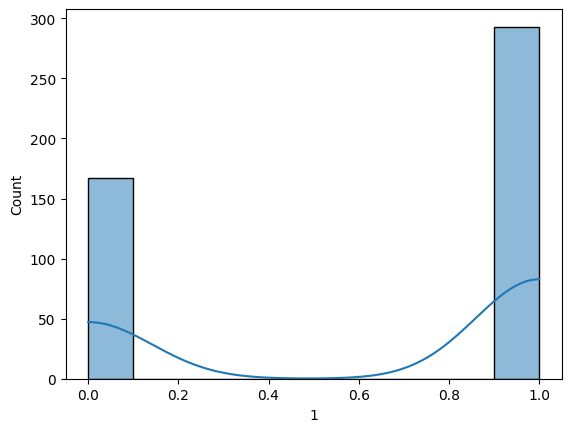

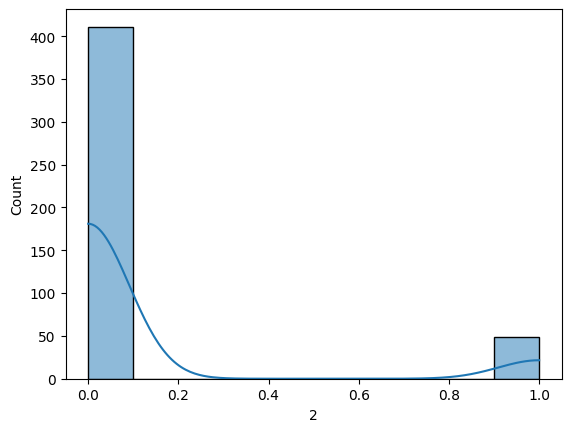

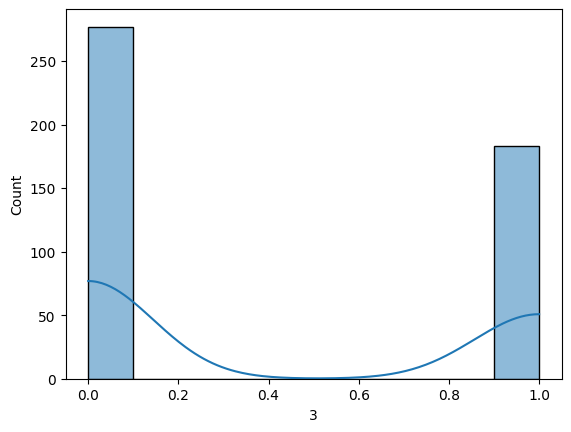

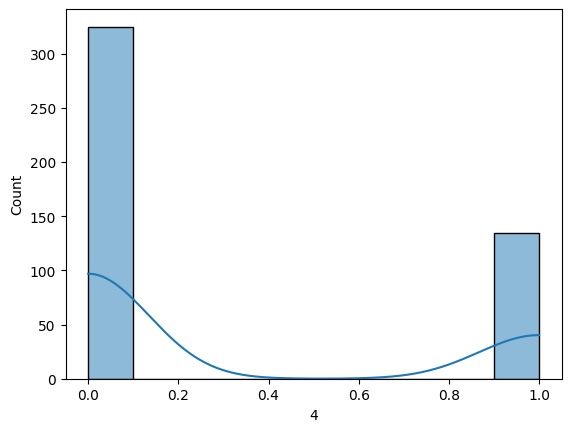

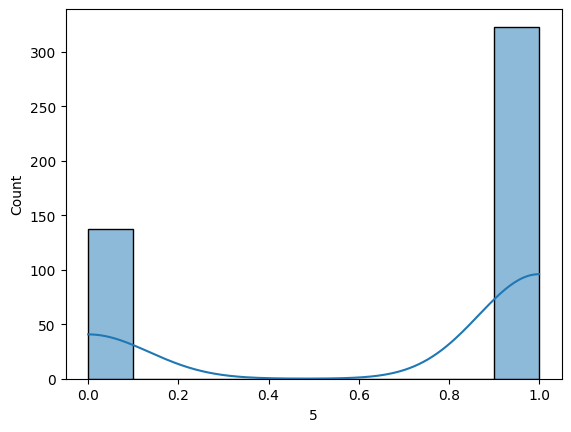

In [55]:
 for i in x.columns:
        sns.histplot(data=x, x=i, kde=True)
        plt.show()

# Multivariate Analysis

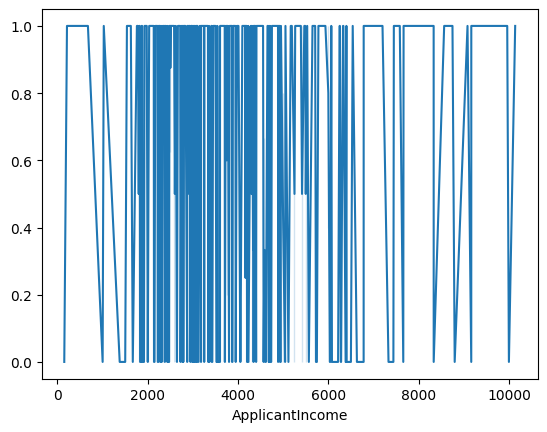

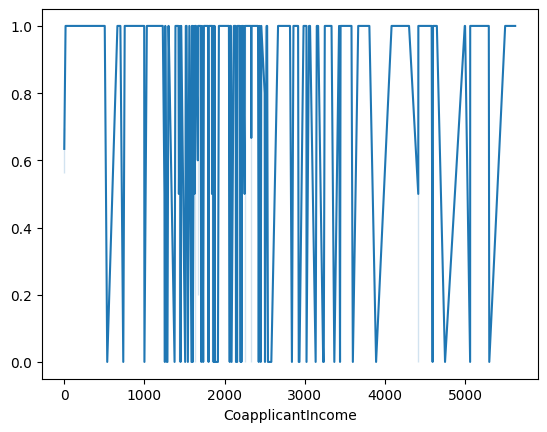

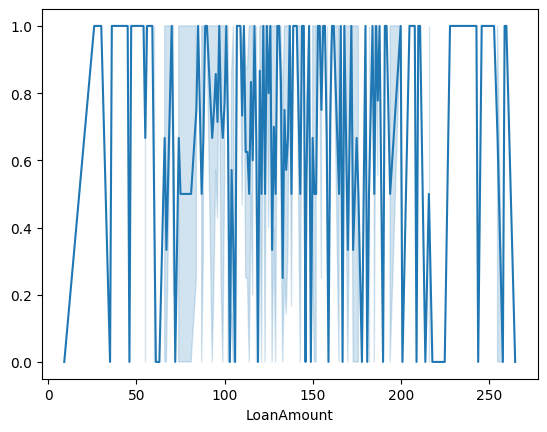

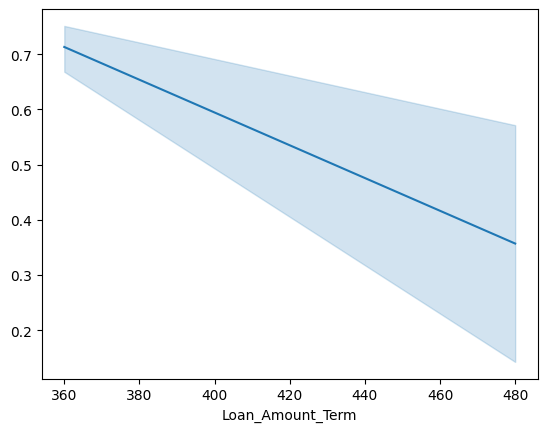

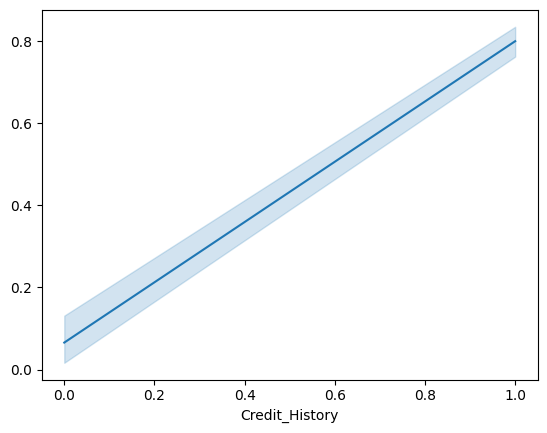

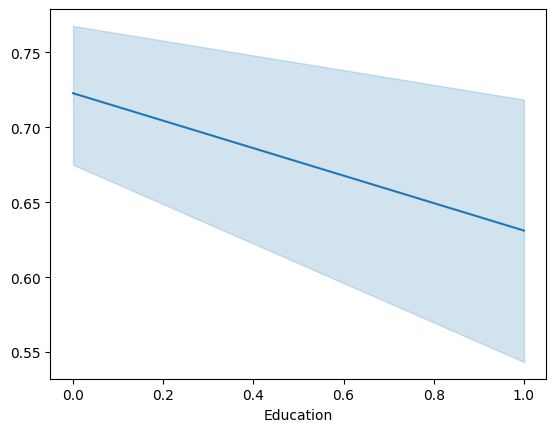

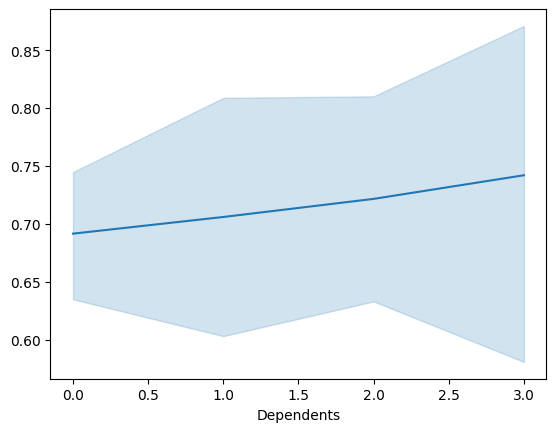

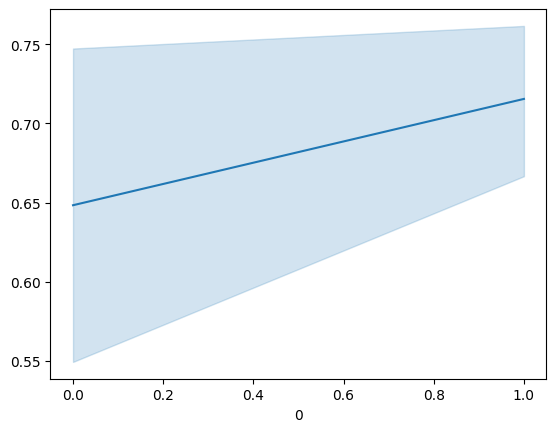

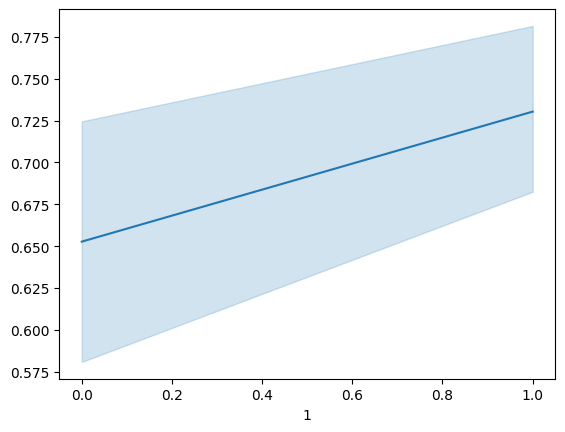

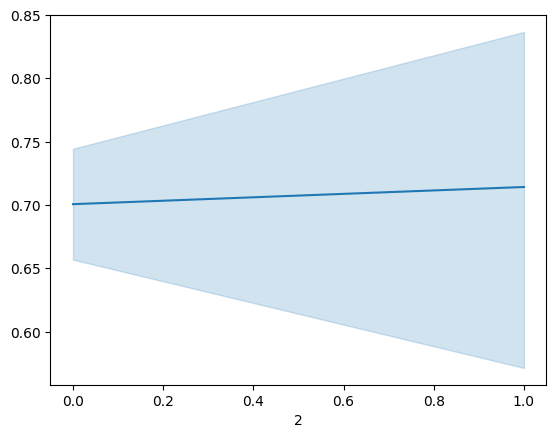

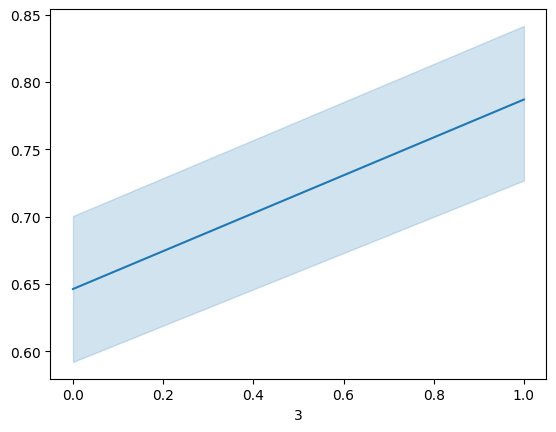

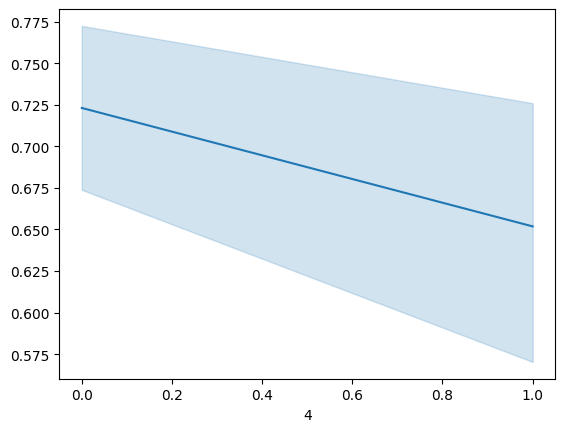

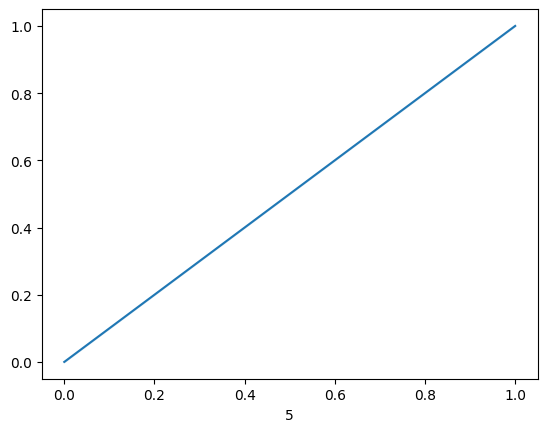

In [56]:
 for i in x.columns:
        sns.lineplot(data=x, x=i, y = Target)
        plt.show()

# skewness check

In [57]:
x.skew()

ApplicantIncome      1.112801
CoapplicantIncome    0.825017
LoanAmount           0.504266
Loan_Amount_Term     5.484943
Credit_History      -2.173627
Education            1.328926
Dependents           1.076388
0                   -1.522056
1                   -0.571476
2                    2.559230
3                    0.418873
4                    0.910049
5                   -0.887097
dtype: float64

# # Multicollinearity

<Axes: >

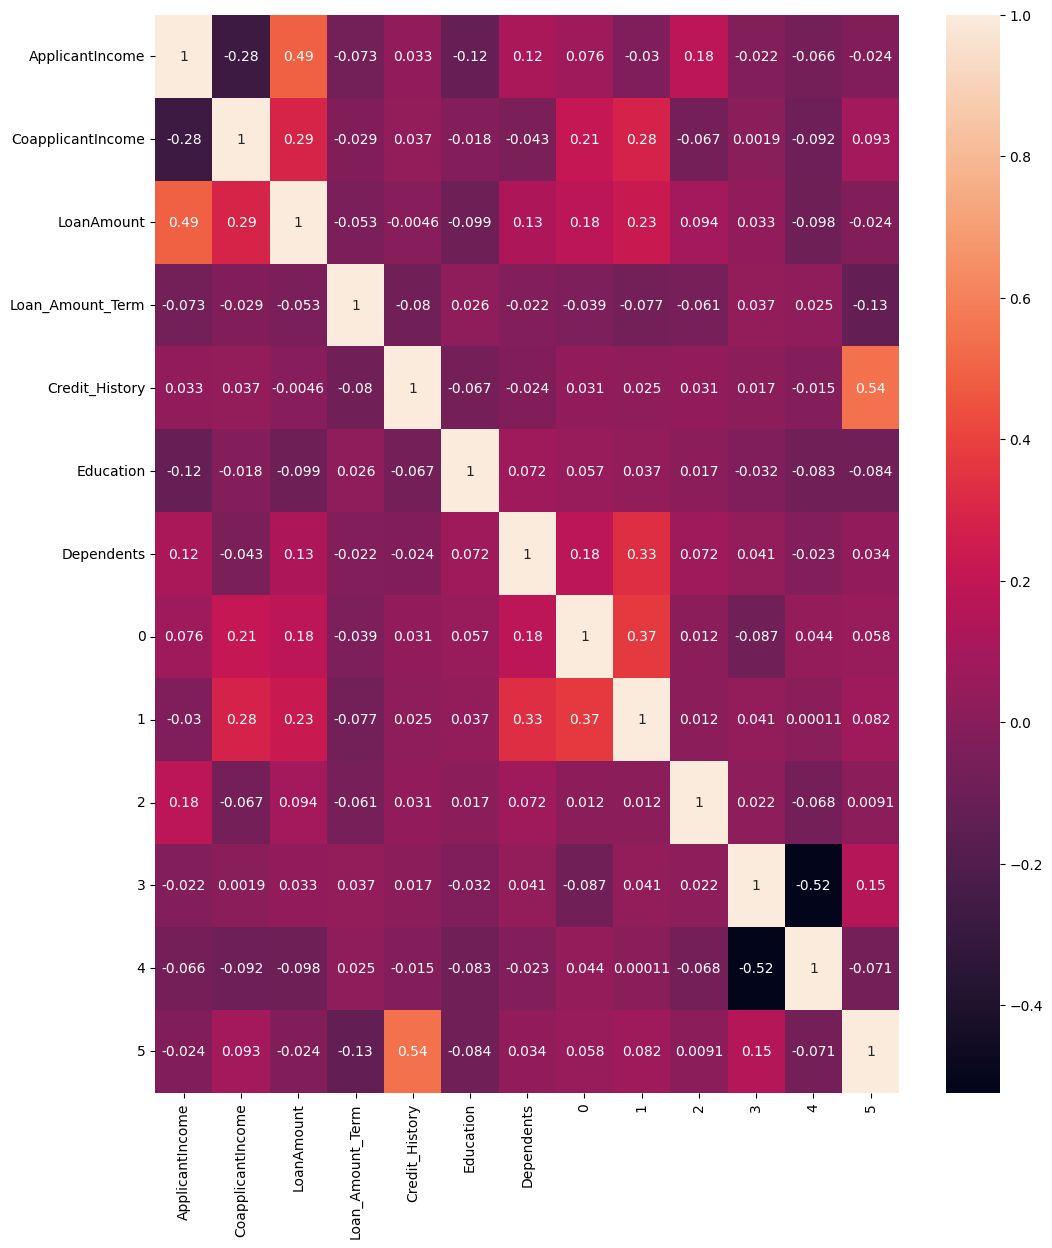

In [58]:
plt.figure(figsize=(12,14))
sns.heatmap(x.corr(), annot=True)

# PowerTransformer

In [59]:
pt = PowerTransformer()

In [60]:
transformed = pd.DataFrame(pt.fit_transform(x))

In [61]:
transformed.skew()

0     0.079655
1    -0.252079
2     0.047063
3     0.000000
4    -2.173627
5     1.328926
6     0.528420
7    -1.522056
8    -0.571476
9     2.559230
10    0.418873
11    0.910049
12   -0.887097
dtype: float64

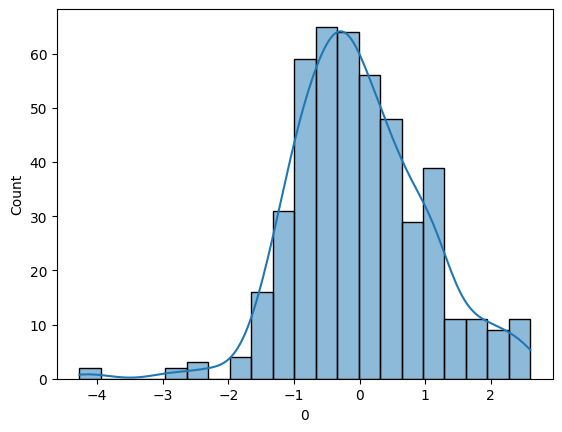

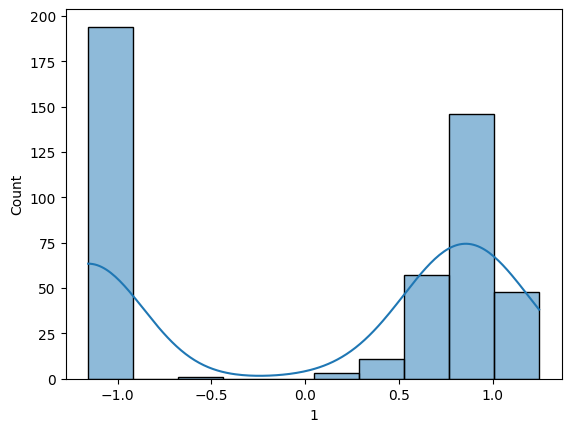

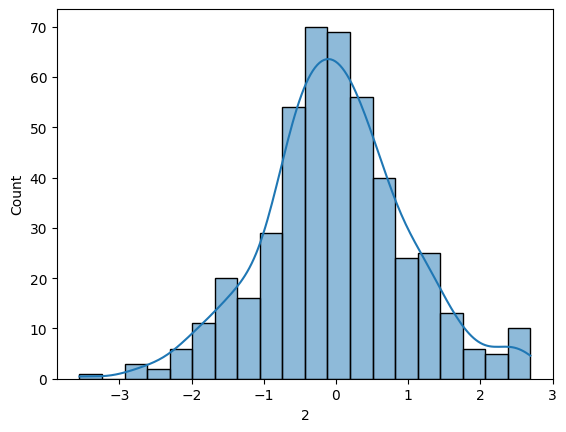

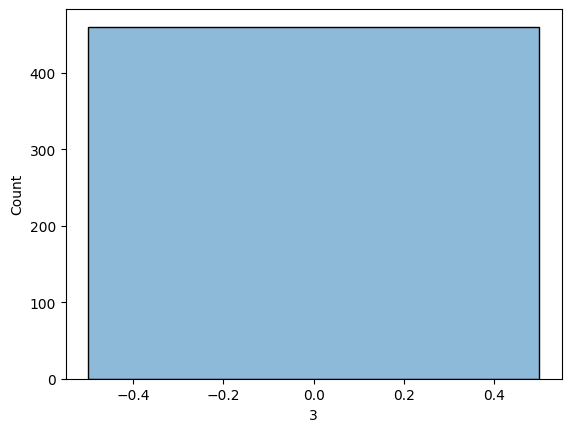

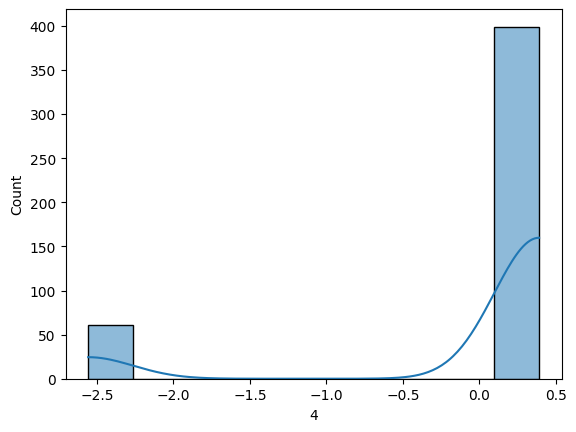

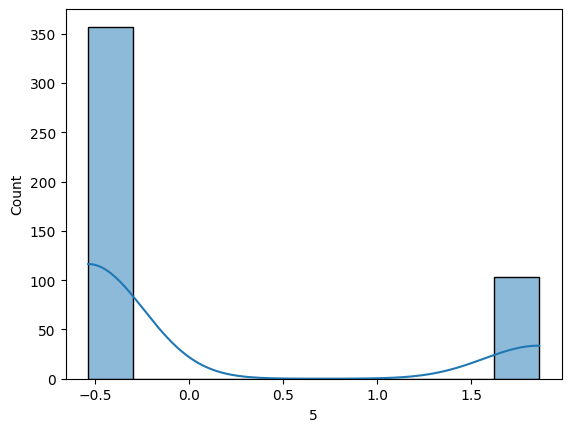

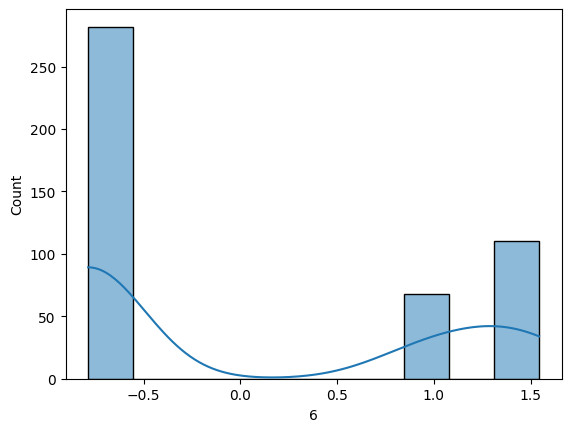

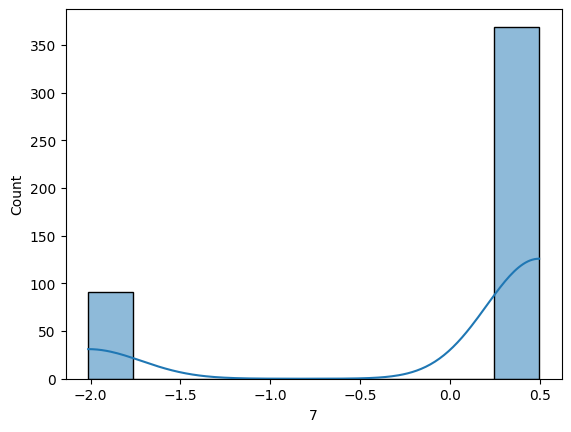

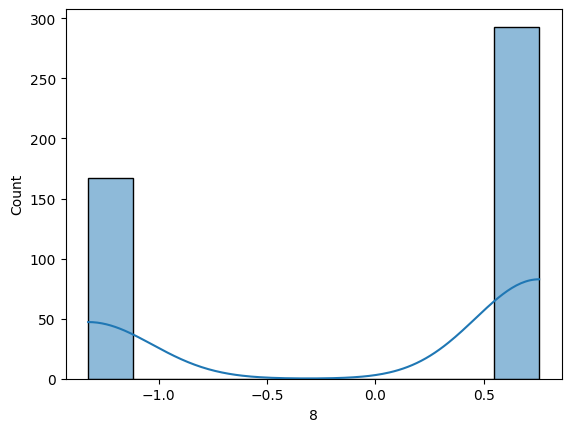

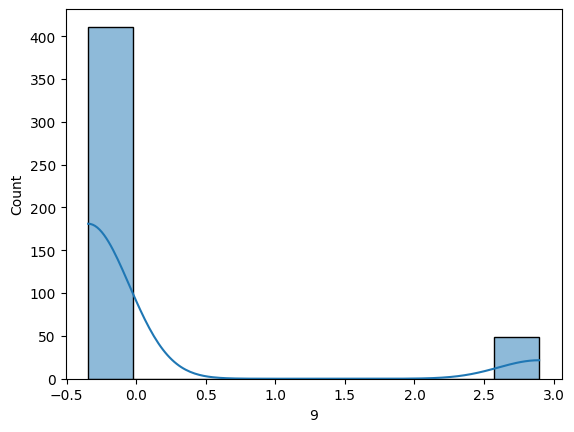

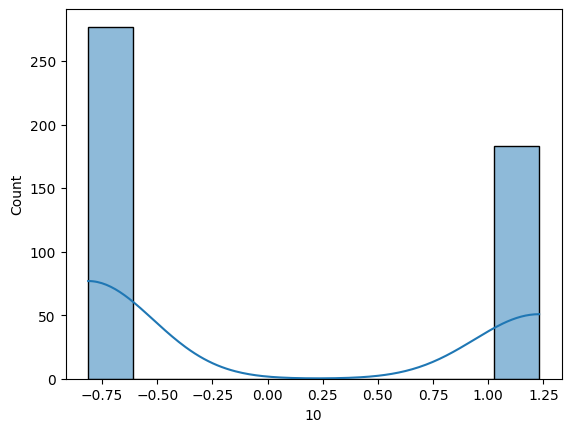

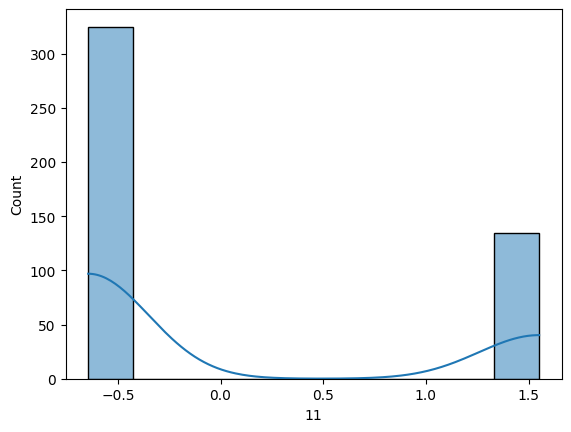

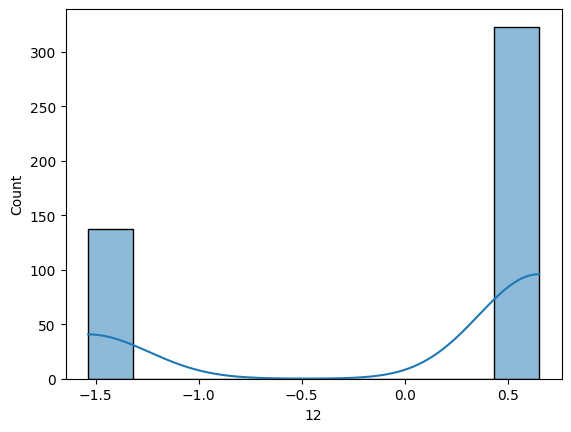

In [62]:
 for i in transformed.columns:
        sns.histplot(data=transformed, x=i, kde=True)
        plt.show()

# RobustScaler

In [63]:
st = RobustScaler()

In [64]:
x_scaled = pd.DataFrame(st.fit_transform(transformed))

In [65]:
x_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.890324,-0.906514,0.367821,0.0,0.000000,0.000000,0.000000,0.00000,-1.0,0.000000,0.0,1.0,0.0
1,0.424355,0.026644,0.036907,0.0,0.000000,0.000000,1.000000,0.00000,0.0,0.000000,0.0,0.0,-1.0
2,-0.296885,-0.906514,-1.228540,0.0,0.000000,0.000000,0.000000,0.00000,0.0,3.241447,0.0,1.0,0.0
3,-0.527270,0.109392,-0.111952,0.0,0.000000,2.398861,0.000000,0.00000,0.0,0.000000,0.0,1.0,0.0
4,0.941336,-0.906514,0.272148,0.0,0.000000,0.000000,0.000000,0.00000,-1.0,0.000000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,-0.177672,0.073761,-0.341829,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
456,-0.350128,-0.906514,-1.114473,0.0,0.000000,0.000000,0.000000,-2.51029,-1.0,0.000000,0.0,0.0,0.0
457,1.569477,-0.276164,2.059927,0.0,0.000000,0.000000,1.000000,0.00000,0.0,0.000000,0.0,1.0,0.0
458,1.431712,-0.906514,1.050570,0.0,0.000000,0.000000,1.237943,0.00000,0.0,0.000000,0.0,1.0,0.0


In [66]:
x_scaled.skew()

0     0.079655
1    -0.252079
2     0.047063
3     0.000000
4    -2.173627
5     1.328926
6     0.528420
7    -1.522056
8    -0.571476
9     2.559230
10    0.418873
11    0.910049
12   -0.887097
dtype: float64

# Imbalance Dataset

In [67]:
smote = SMOTE()


In [68]:
x_sampled, y_sampled = smote.fit_resample(x_scaled, Target)

# Principal Component Analysis

In [69]:
pca = PCA(n_components=12)

In [70]:
selected = pd.DataFrame(pca.fit_transform(x_sampled))

In [71]:
selected

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.762797,0.311903,0.563374,-0.571491,-0.321578,-1.118896,-0.469399,-0.121455,-0.506145,0.580632,-0.100942,-0.014126
1,-0.596546,-0.127497,0.369661,-0.757460,0.039029,-0.048398,0.165980,0.512402,0.524714,-0.617237,0.468738,-0.045942
2,-0.984093,-0.092408,0.576618,1.723743,2.621014,-0.658891,-0.415146,0.073267,-0.640162,-0.315058,-0.576765,0.147611
3,-0.559793,-1.073551,-1.782780,-0.024953,-0.172313,0.179363,-0.679729,0.037389,-0.749735,-0.025805,-0.308004,-0.137893
4,-0.753831,0.330395,0.541678,-0.558954,-0.297089,-1.185965,-0.424751,-0.114306,-0.526437,0.537053,-0.082558,-0.044358
...,...,...,...,...,...,...,...,...,...,...,...,...
641,-0.641583,-0.112990,0.553823,-0.809244,-0.285103,0.043499,-0.497955,-0.271814,0.340896,-0.759607,0.249746,0.054976
642,2.840274,1.448591,0.664128,0.762498,-0.673464,-0.177729,0.492079,-0.399189,-0.008751,-0.015769,-0.055088,-0.172038
643,-0.448768,-1.126714,-1.235469,0.326137,-0.897943,-0.697825,-0.187154,-0.194832,0.322722,-0.593432,-0.246586,0.442630
644,-0.646742,-0.114368,0.577482,-0.880221,-0.271302,0.132679,-1.092892,0.188738,0.338550,0.200476,0.139149,-0.516440


In [72]:
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_sum = np.cumsum(explained_variance_ratios)
cumulative_sum

array([0.20681624, 0.3866322 , 0.53435652, 0.67629198, 0.77743683,
       0.84136803, 0.888013  , 0.92860622, 0.95403774, 0.97293859,
       0.98784027, 1.        ])

# StandardScaler

In [73]:
sts = StandardScaler()

In [74]:
s_scaled = pd.DataFrame(sts.fit_transform(selected))

In [75]:
s_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.634061,0.278048,0.554096,-0.573428,-0.382233,-1.672813,-0.821588,-0.227878,-1.199785,1.596522,-0.312586,-0.048424
1,-0.495867,-0.113658,0.363573,-0.760026,0.046391,-0.072358,0.290514,0.961388,1.243801,-1.697172,1.451532,-0.157493
2,-0.818009,-0.082377,0.567122,1.729582,3.115385,-0.985080,-0.726629,0.137466,-1.517463,-0.866290,-1.786059,0.506025
3,-0.465317,-0.957024,-1.753420,-0.025038,-0.204814,0.268158,-1.189728,0.070150,-1.777197,-0.070954,-0.953791,-0.472709
4,-0.626608,0.294533,0.532757,-0.560848,-0.353125,-1.773085,-0.743441,-0.214466,-1.247884,1.476693,-0.255657,-0.152063
...,...,...,...,...,...,...,...,...,...,...,...,...
641,-0.533304,-0.100726,0.544702,-0.811986,-0.338879,0.065034,-0.871570,-0.509988,0.808071,-2.088634,0.773385,0.188462
642,2.360925,1.291356,0.653191,0.765081,-0.800492,-0.265715,0.861284,-0.748972,-0.020743,-0.043360,-0.170589,-0.589760
643,-0.373030,-1.004417,-1.215122,0.327242,-1.067311,-1.043289,-0.327576,-0.365551,0.764993,-1.631715,-0.763599,1.517375
644,-0.537592,-0.101954,0.567971,-0.883203,-0.322474,0.198362,-1.912885,0.354117,0.802511,0.551235,0.430901,-1.770402


# Best Feature Selection

In [76]:

rf = RandomForestClassifier()

In [77]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [78]:
sfs = SequentialFeatureSelector(rf, k_features='best', forward=True, scoring='accuracy', cv=5)


sfs.fit(s_scaled, y_sampled)

SequentialFeatureSelector(estimator=RandomForestClassifier(),
                          k_features=(1, 12), scoring='accuracy')

In [79]:
selected1 = sfs.k_feature_names_
selected1

(0, 1, 2, 5, 6, 8, 9, 11)

In [140]:
final_selected = s_scaled.drop([3,4,7], axis=1)

# Train_Test_Split 

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(final_selected, y_sampled, test_size = 0.20, random_state=42, stratify = y_sampled)

# Model Building

In [142]:
models = {'kbc' : KNeighborsClassifier(), 'rfc' : RandomForestClassifier(), 'ada' : AdaBoostClassifier(), 'ir' : LogisticRegression(), 'gbc' : GradientBoostingClassifier(), 'XG' : XGBClassifier(), 'SVC' : SVC()}


In [143]:

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_train_pred1 = model.predict(X_train)
    y_test_pred1 = model.predict(X_test)
    print(',,,,,,,,,,,,,,,,,,,,,,,,,,')
    print(model_name)
    print('Training_accuracy Score:', accuracy_score(Y_train, y_train_pred1))
    print('Testing_accuracy Score:', accuracy_score(Y_test, y_test_pred1))
    print('----------------------------------------------------')
    print(confusion_matrix(Y_train, y_train_pred1))
    print(confusion_matrix(Y_test, y_test_pred1))
    print('----------------------------------------------------')
   

,,,,,,,,,,,,,,,,,,,,,,,,,,
kbc
Training_accuracy Score: 0.9922480620155039
Testing_accuracy Score: 1.0
----------------------------------------------------
[[258   0]
 [  4 254]]
[[65  0]
 [ 0 65]]
----------------------------------------------------
,,,,,,,,,,,,,,,,,,,,,,,,,,
rfc
Training_accuracy Score: 1.0
Testing_accuracy Score: 1.0
----------------------------------------------------
[[258   0]
 [  0 258]]
[[65  0]
 [ 0 65]]
----------------------------------------------------
,,,,,,,,,,,,,,,,,,,,,,,,,,
ada
Training_accuracy Score: 1.0
Testing_accuracy Score: 1.0
----------------------------------------------------
[[258   0]
 [  0 258]]
[[65  0]
 [ 0 65]]
----------------------------------------------------
,,,,,,,,,,,,,,,,,,,,,,,,,,
ir
Training_accuracy Score: 1.0
Testing_accuracy Score: 1.0
----------------------------------------------------
[[258   0]
 [  0 258]]
[[65  0]
 [ 0 65]]
----------------------------------------------------
,,,,,,,,,,,,,,,,,,,,,,,,,,
gbc
Training_ac

# #  Best Model.............................................................................

# Logistic Regression

In [144]:
rf = LogisticRegression()

In [145]:
rf.fit(X_train, Y_train)

LogisticRegression()

In [146]:
ypred_train = rf.predict(X_train)

In [147]:
ypred_test = rf.predict(X_test)

# Accuracy

In [148]:
accuracy_score(Y_train, ypred_train)

1.0

In [149]:
accuracy_score(Y_test, ypred_test)

1.0

# confusion_matrix

In [150]:
confusion_matrix(Y_train, ypred_train)

array([[258,   0],
       [  0, 258]], dtype=int64)

In [151]:
confusion_matrix(Y_test, ypred_test)

array([[65,  0],
       [ 0, 65]], dtype=int64)

# classification_report

In [152]:
print(classification_report(Y_train, ypred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00       258

    accuracy                           1.00       516
   macro avg       1.00      1.00      1.00       516
weighted avg       1.00      1.00      1.00       516



In [153]:
print(classification_report(Y_test, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        65

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



# Cross_validation

In [154]:
scores7 = cross_val_score(rf, X_train, Y_train)

In [155]:
scores7.mean()

1.0

# Randomized Search Cv

In [156]:
param_grid = {
    'penalty': ['l2'],
    'dual': [False],
    'tol': [0.0001],
    'fit_intercept': [True],
    'intercept_scaling': [1],
    'class_weight': [None],
    'random_state': [None],
    'solver': ['lbfgs'],
    'max_iter': [100],
    'multi_class': ['auto'],
    'verbose': [0],
    'warm_start': [False],
    'n_jobs': [None],
    'l1_ratio': [None]
}

In [157]:
gscv = RandomizedSearchCV(param_distributions = param_grid, estimator = rf, cv=5)

In [160]:
gscv.fit(final_selected, y_sampled)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'class_weight': [None], 'dual': [False],
                                        'fit_intercept': [True],
                                        'intercept_scaling': [1],
                                        'l1_ratio': [None], 'max_iter': [100],
                                        'multi_class': ['auto'],
                                        'n_jobs': [None], 'penalty': ['l2'],
                                        'random_state': [None],
                                        'solver': ['lbfgs'], 'tol': [0.0001],
                                        'verbose': [0], 'warm_start': [False]})

In [161]:
gscv.best_params_

{'warm_start': False,
 'verbose': 0,
 'tol': 0.0001,
 'solver': 'lbfgs',
 'random_state': None,
 'penalty': 'l2',
 'n_jobs': None,
 'multi_class': 'auto',
 'max_iter': 100,
 'l1_ratio': None,
 'intercept_scaling': 1,
 'fit_intercept': True,
 'dual': False,
 'class_weight': None}

# After Applying Randomized Search Cv

In [162]:
rf1 = LogisticRegression(warm_start= False, intercept_scaling=1, dual=False, max_iter=100, multi_class = 'auto', solver='lbfgs', tol=0.0001, penalty='l2')

In [163]:
rf1.fit(X_train, Y_train)

LogisticRegression()

In [164]:
ypred_train1 = rf1.predict(X_train)

In [165]:
ypred_test1 = rf1.predict(X_test)

# Cross Validation

In [166]:
scores = cross_val_score(rf1, X_train, Y_train)

In [167]:
scores.mean()

1.0

# Accuracy Check

# Accuracy_Score

In [168]:
accuracy_score(Y_train, ypred_train1)

1.0

In [169]:
accuracy_score(Y_test, ypred_test1)

1.0

# Confusion_Matrix

In [170]:
confusion_matrix(Y_train, ypred_train1)

array([[258,   0],
       [  0, 258]], dtype=int64)

In [171]:
confusion_matrix(Y_test, ypred_test1)

array([[65,  0],
       [ 0, 65]], dtype=int64)

# classification_report

In [172]:
print(classification_report(Y_train, ypred_train1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00       258

    accuracy                           1.00       516
   macro avg       1.00      1.00      1.00       516
weighted avg       1.00      1.00      1.00       516



In [173]:
print(classification_report(Y_test, ypred_test1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        65

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130

